<a href="https://colab.research.google.com/github/Shalaka127/Reddit_sentiment_analaysis/blob/main/Finalredditanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install praw textblob matplotlib seaborn pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 4.6 MB/s eta 0:00:00


In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
import praw
import prawcore
import textblob
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import webbrowser
import requests
import uuid
import os
import getpass
from collections import defaultdict
import time
import math

In [ ]:
# -------- Step 1: Define Your Reddit App Info --------
client_id = 'client_id'          # 🔁 Replace this with your Reddit app's client_id
client_secret ='client_secret'                    # 🔁 Installed apps usually leave this blank
redirect_uri = 'http://localhost:8080'  # This can be a dummy URL for manual flow
user_agent = 'sentiment-app by u/YOUR_USERNAME'

# -------- Step 2: Create Reddit Instance --------
reddit = praw.Reddit(
    client_id=client_id,
    client_secret=client_secret,
    redirect_uri=redirect_uri,
    user_agent=user_agent
)


In [ ]:
# -------- Step 3: Generate Authorization URL --------
scopes = ['identity', 'history', 'read']
auth_url = reddit.auth.url(scopes, 'state123', 'permanent')
print("Go to this URL and authorize access:")
print(auth_url)

Go to this URL and authorize access:
https://www.reddit.com/api/v1/authorize?client_id=tDU-wQyVJLp0jUjYbEW5-A&duration=permanent&redirect_uri=http%3A%2F%2Flocalhost%3A8080&response_type=code&scope=identity+history+read&state=state123


/tmp/ipython-input-2029807464.py:3: DeprecationWarning: Positional arguments for 'Auth.url' will no longer be supported in PRAW 8.
Call this function with 'scopes', 'state', and 'duration' as keyword arguments.
  auth_url = reddit.auth.url(scopes, 'state123', 'permanent')


In [ ]:

# -------- Step 4: Get Access Token Using the Code --------
# Paste the code you got from the URL after authorization
auth_code = input("Paste the authorization code here: ")

# Get the access token
refresh_token = reddit.auth.authorize(auth_code)

# Confirm login
print("Logged in as:", reddit.user.me())


Paste the authorization code here: hnMhxfIlpDXgImgsZu5QvRkLGUhAHQ


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Logged in as: Magic_sense10


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




🔍 Analyzing Reddit activity for: u/Magic_sense10...


Fetching recent comments for u/Magic_sense10...
✅ Found 6 comments.

Fetching recent upvoted posts for the authenticated user (u/Magic_sense10)...
  Processed 10/30 potential upvoted items...
✅ Found 12 accessible upvoted posts/comments.

--- Visualizing u/Magic_sense10's Activity Data ---


/tmp/ipython-input-4090181714.py:156: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Set2', order=['Positive', 'Neutral', 'Negative'])


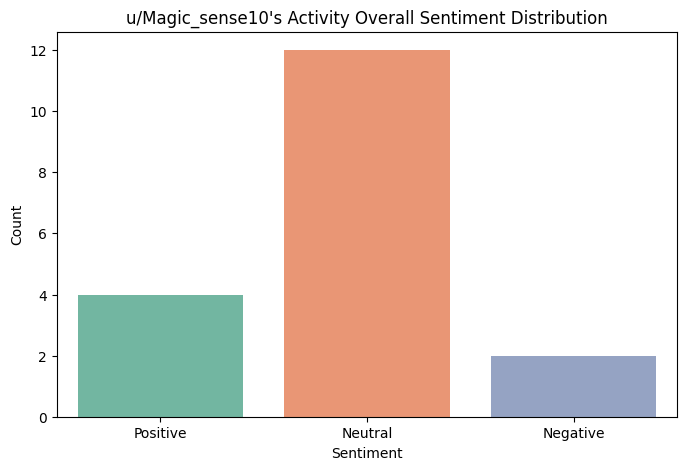

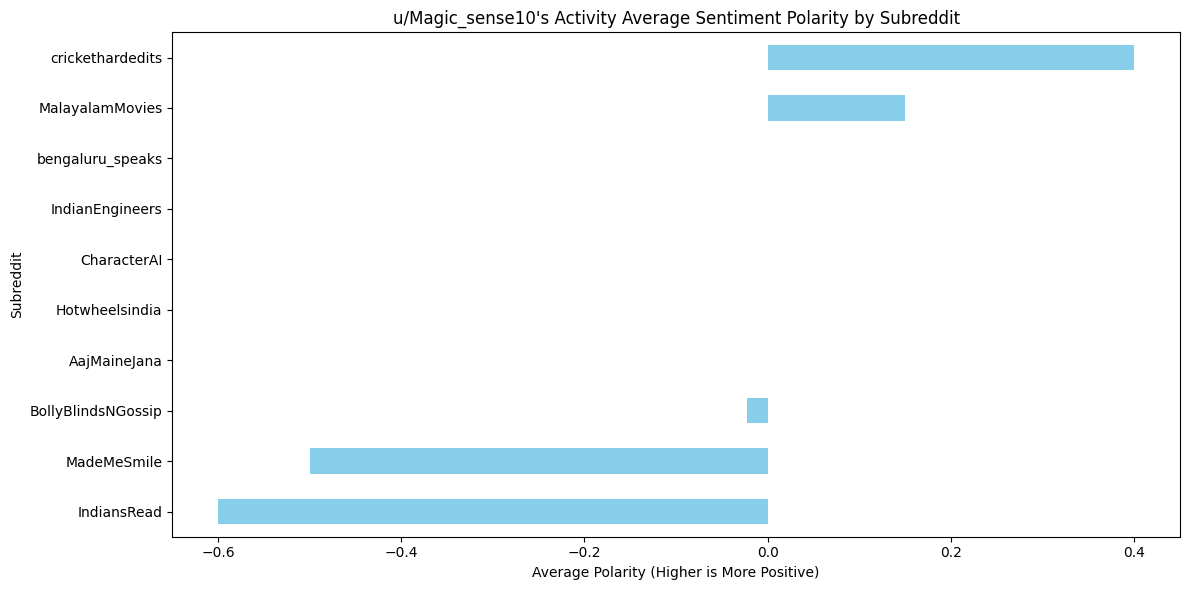

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.




Fetching hot posts from r/indiansread...
  Accessing r/IndiansRead...
  Processed 10/30 posts...
  Processed 20/30 posts...
  Processed 30/30 posts...
✅ Found 30 posts in r/IndiansRead.

📊 Sentiment analysis results for r/indiansread

--- Visualizing r/indiansread Hot Posts Data ---


/tmp/ipython-input-4090181714.py:156: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='Set2', order=['Positive', 'Neutral', 'Negative'])


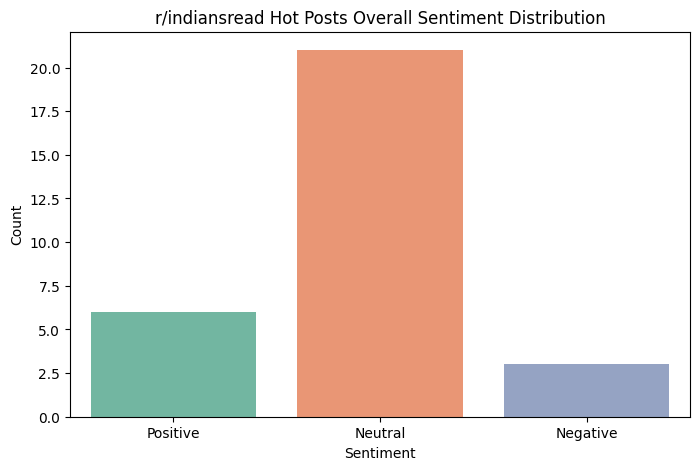

   Single subreddit found: IndiansRead. Average polarity: 0.085


In [ ]:
import seaborn as sns

# ----------- SENTIMENT UTILITIES -------------
def get_sentiment(text):
    """Calculates polarity and subjectivity of a text string."""
    if not text or not isinstance(text, str):
        return 0.0, 0.0 # Return neutral for empty or non-string input
    try:
        analysis = TextBlob(text)
        return analysis.polarity, analysis.subjectivity
    except Exception as e:
        print(f"⚠️ TextBlob Error processing text: '{text[:50]}...'. Error: {e}")
        return 0.0, 0.0 # Return neutral on error

def sentiment_label(score):
    """Categorizes polarity score into Positive, Negative, Neutral."""
    if score > 0.1:
        return 'Positive'
    elif score < -0.1:
        return 'Negative'
    return 'Neutral'

# ----------- 1. USER COMMENTS ANALYSIS -------------
def analyze_user_comments(username, limit=50):
    """Fetches and analyzes recent comments for a given Reddit user."""
    print(f"\nFetching recent comments for u/{username}...")
    comments = []
    try:
        user = reddit.redditor(username)
        for i, comment in enumerate(user.comments.new(limit=limit)):
            if (i + 1) % 10 == 0:
                print(f"  Processed {i+1}/{limit} comments...")
            polarity, subjectivity = get_sentiment(comment.body)
            comments.append({
                'type': 'Comment',
                'subreddit': str(comment.subreddit),
                'text': comment.body,
                'polarity': polarity,
                'subjectivity': subjectivity
            })
        print(f"✅ Found {len(comments)} comments.")
    except prawcore.exceptions.NotFound:
        print(f"⚠️ Error: Reddit user '{username}' not found.")
    except Exception as e:
        print(f"⚠️ An error occurred fetching comments for {username}: {e}")
    return comments

# ----------- 2. USER UPVOTED POSTS ANALYSIS -------------
def analyze_upvoted_posts(username, limit=30):
    """Fetches and analyzes recent upvoted posts for the *authenticated* user."""
    print(f"\nFetching recent upvoted posts for the authenticated user (u/{reddit.user.me().name})...")
    posts = []
    try:
        user = reddit.user.me()
        if not user:
             print("⚠️ Cannot fetch upvoted posts: Not properly authenticated.")
             return posts

        if user.name.lower() != username.lower():
            print(f"⚠️ Warning: Can only fetch upvoted posts for the authenticated user (u/{user.name}), not for u/{username}.")
            print(f"Fetching upvoted posts for u/{user.name} instead.")

        fetched_count = 0
        for i, post in enumerate(user.upvoted(limit=limit)):
            item_text = ""
            subreddit_name = "N/A"
            try:
                if isinstance(post, praw.models.Submission):
                    item_text = post.title
                    subreddit_name = str(post.subreddit)
                elif isinstance(post, praw.models.Comment):
                    item_text = post.body
                    subreddit_name = str(post.subreddit)
                else:
                    continue

                polarity, subjectivity = get_sentiment(item_text)
                posts.append({
                    'type': 'Upvoted ' + type(post).__name__,
                    'subreddit': subreddit_name,
                    'text': item_text,
                    'polarity': polarity,
                    'subjectivity': subjectivity
                })
                fetched_count += 1
                if (i + 1) % 10 == 0:
                     print(f"  Processed {i+1}/{limit} potential upvoted items...")

            except Exception as inner_e:
                print(f"⚠️ Error processing an upvoted item: {inner_e}")
                continue

        print(f"✅ Found {fetched_count} accessible upvoted posts/comments.")
        if fetched_count == 0:
             print("   (This could be due to privacy settings, no recent upvotes, or API limitations.)")

    except prawcore.exceptions.Forbidden as e:
        print(f"⚠️ Error: Access Forbidden. Check if the 'history' scope was granted during authorization. {e}")
    except Exception as e:
        print(f"⚠️ An error occurred fetching upvoted posts: {e}")
    return posts


# ----------- 3. SUBREDDIT ANALYSIS -------------
def analyze_subreddit_posts(subreddit_name, limit=30):
    """Fetches and analyzes hot posts from a given subreddit."""
    print(f"\nFetching hot posts from r/{subreddit_name}...")
    posts = []
    try:
        subreddit = reddit.subreddit(subreddit_name)
        subreddit.fullname # Accessing an attribute like fullname can trigger exceptions
        print(f"  Accessing r/{subreddit.display_name}...")
        for i, post in enumerate(subreddit.hot(limit=limit)):
             if (i + 1) % 10 == 0:
                 print(f"  Processed {i+1}/{limit} posts...")
             if not post.is_self:
                 polarity, subjectivity = get_sentiment(post.title)
             else:
                 combined_text = post.title + ". " + post.selftext[:200]
                 polarity, subjectivity = get_sentiment(combined_text)

             posts.append({
                'type': 'Subreddit Post',
                'subreddit': subreddit.display_name,
                'text': post.title,
                'polarity': polarity,
                'subjectivity': subjectivity
            })
        print(f"✅ Found {len(posts)} posts in r/{subreddit.display_name}.")
    except prawcore.exceptions.Redirect:
        print(f"⚠️ Error: Subreddit r/{subreddit_name} not found or redirected.")
    except prawcore.exceptions.Forbidden:
        print(f"⚠️ Error: Subreddit r/{subreddit_name} is private or quarantined.")
    except Exception as e:
        print(f"⚠️ An error occurred fetching posts from r/{subreddit_name}: {e}")
    return posts

# ----------- 4. COMBINED ANALYSIS + VISUALIZATION -------------
def visualize_analysis(data, title_prefix=""):
    """Creates visualizations for the sentiment data."""
    if not data:
        print("⚠️ No data provided for visualization.")
        return None

    df = pd.DataFrame(data)
    if df.empty:
        print("⚠️ DataFrame is empty, cannot visualize.")
        return df

    df['sentiment'] = df['polarity'].apply(sentiment_label)
    print(f"\n--- Visualizing {title_prefix} Data ---")

    # Countplot for Sentiment Distribution
    plt.figure(figsize=(8, 5))
    try:
        sns.countplot(x='sentiment', data=df, palette='Set2', order=['Positive', 'Neutral', 'Negative'])
        plt.title(f"{title_prefix} Overall Sentiment Distribution")
        plt.xlabel("Sentiment")
        plt.ylabel("Count")
        plt.show()
    except Exception as e:
        print(f"⚠️ Error creating countplot: {e}")

    # Subreddit-wise sentiment average
    if df['subreddit'].nunique() > 1:
        plt.figure(figsize=(12, max(6, df['subreddit'].nunique() * 0.4)))
        try:
            # Ensure polarity is numeric before grouping
            df['polarity'] = pd.to_numeric(df['polarity'], errors='coerce')
            avg_sent = df.groupby('subreddit')['polarity'].mean().dropna().sort_values()
            if not avg_sent.empty:
                avg_sent.plot(kind='barh', color='skyblue')
                plt.title(f"{title_prefix} Average Sentiment Polarity by Subreddit")
                plt.xlabel("Average Polarity (Higher is More Positive)")
                plt.ylabel("Subreddit")
                plt.tight_layout()
                plt.show()
            else:
                 print("   Skipping subreddit sentiment plot: No valid average sentiment data after grouping.")
        except Exception as e:
            print(f"⚠️ Error creating subreddit bar plot: {e}")
    elif df['subreddit'].nunique() == 1:
        avg_pol = df['polarity'].mean()
        print(f"   Single subreddit found: {df['subreddit'].iloc[0]}. Average polarity: {avg_pol:.3f}")
    else:
        print("   Skipping subreddit sentiment plot: No valid subreddits found in data.")


    return df

# ----------- MAIN EXECUTION LOGIC -------------
def run_all_analysis():
    """Runs the complete analysis workflow without OpenAI."""
    # Ensure Reddit connection is established
    if not reddit.user.me():
        print("❌ Reddit authentication failed or was skipped. Cannot proceed.")
        return None

    # Determine the username to analyze
    authenticated_username = reddit.user.me().name
    username_input = input(f"Enter the Reddit username to analyze (or press Enter to analyze the logged-in user 'u/{authenticated_username}'): ")
    username_to_analyze = username_input.strip() if username_input.strip() else authenticated_username
    print(f"\n🔍 Analyzing Reddit activity for: u/{username_to_analyze}...\n")

    # --- User-Specific Analysis ---
    comments_data = analyze_user_comments(username_to_analyze, limit=50)
    upvoted_data = []
    if username_to_analyze.lower() == authenticated_username.lower():
        upvoted_data = analyze_upvoted_posts(username_to_analyze, limit=30)
    else:
        print(f"\nSkipping upvoted posts analysis: Can only analyze upvoted posts for the logged-in user (u/{authenticated_username}), not for u/{username_to_analyze}.")

    all_user_data = comments_data + upvoted_data

    df_user = None
    if all_user_data:
        df_user = visualize_analysis(all_user_data, title_prefix=f"u/{username_to_analyze}'s Activity")
        if df_user is None or df_user.empty:
            print(f"\nNo valid data points found for u/{username_to_analyze} after processing.")
    else:
        print(f"\nNo comment or accessible upvote data found for u/{username_to_analyze}.")

    # --- Optional Subreddit Analysis ---
    while True:
        subreddit_choice = input("\nEnter a subreddit name to analyze (e.g., 'python', 'mentalhealth'), or type 'no' to skip: ").strip()
        if subreddit_choice.lower() == 'no' or subreddit_choice == '':
            break
        # Basic validation for subreddit name (can be improved)
        if not all(c.isalnum() or c == '_' for c in subreddit_choice):
             print("⚠️ Invalid subreddit name format. Please use letters, numbers, or underscores.")
             continue
        else:
            sub_data = analyze_subreddit_posts(subreddit_choice, limit=30)
            if sub_data:
                print(f"\n📊 Sentiment analysis results for r/{subreddit_choice}")
                visualize_analysis(sub_data, title_prefix=f"r/{subreddit_choice} Hot Posts")
            else:
                print(f"Could not retrieve or analyze data for r/{subreddit_choice}.")

    print("\n✅ Analysis Complete!")
    return df_user

# 🚀 RUN THE ANALYSIS!
if __name__ == "__main__":
    df_analysis_result = run_all_analysis()

    if df_analysis_result is not None and not df_analysis_result.empty:
        print("\n--- User Analysis DataFrame Sample ---")
        print(df_analysis_result.head())
        # Example: Save to CSV if needed
        # try:
        #     df_analysis_result.to_csv('reddit_sentiment_analysis.csv', index=False)
        #     print("\n💾 User analysis saved to reddit_sentiment_analysis.csv")
        # except Exception as e:
        #     print(f"\n⚠️ Could not save DataFrame to CSV: {e}")